<a href="https://colab.research.google.com/github/brepowell/makeblobs-clustering-practice/blob/main/ClusteringPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

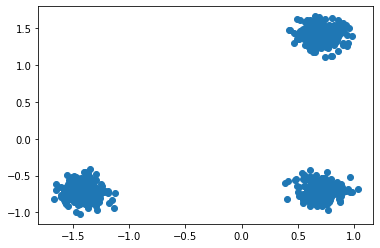

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.913


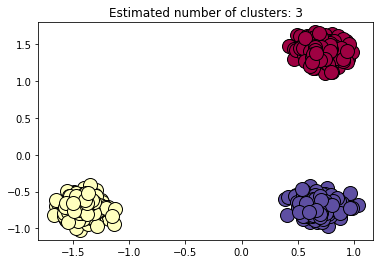

In [ ]:
# EXPERIMENT WITH changing the standard deviation (cluster_std)
# PLAY WITH THE HYPERPARAMETERS FOR DBSCAN
# TRY CONVERTING THIS TO KMEANS
# PLAY AROUND WITH THE HYPERPARAMETERS FOR KMEANS TOO

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html 

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

n_samples = 750

centers = [[1, 1], [-1, -1], [1, -1]]

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, labels_true = make_blobs(
    n_samples=n_samples, centers=centers, cluster_std=0.1, random_state=0     # 3 NICE CLUSTERS
    # n_samples=n_samples, centers=centers, cluster_std=0.4, random_state=0   # ORIGINAL -- 3 NICE CLUSTERS
    # n_samples=n_samples, centers=centers, cluster_std=0.6, random_state=0   # EVERYTHING IS PART OF ONE BIG CLUSTER!!!!!!!!
)

#X, labels_true = make_blobs(
#    n_samples=n_samples, centers=centers, cluster_std=0.60, random_state=0
#)

X = StandardScaler().fit_transform(X)


plt.scatter(X[:, 0], X[:, 1])
plt.show()

#------------------------------PLAYING ------------------------------------
# db = DBSCAN(eps=0.3, min_samples=10).fit(X) # ORIGINAL
# db = DBSCAN(eps=0.6, min_samples=10).fit(X) # STILL GOOD
# db = DBSCAN(eps=0.9, min_samples=10).fit(X) # STILL GOOD
# db = DBSCAN(eps=0.3, min_samples=20).fit(X) # STILL GOOD
# db = DBSCAN(eps=0.3, min_samples=40).fit(X) # STILL GOOD
# db = DBSCAN(eps=0.1, min_samples=100).fit(X) # MOST IS CATEGORIZED AS NOISE
# db = DBSCAN(eps=0.9, min_samples=2).fit(X) # STILL GOOD - CLEAR SEPARATION
db = DBSCAN(eps=.99999, min_samples=1).fit(X) # STILL GOOD - CLEAR SEPARATION

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")



unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

#KMEANS

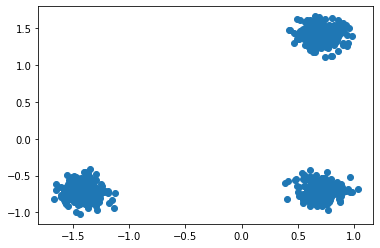

Estimated number of clusters: 4
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 0.829
V-measure: 0.906
Adjusted Rand Index: 0.872
Adjusted Mutual Information: 0.906
Silhouette Coefficient: 0.719


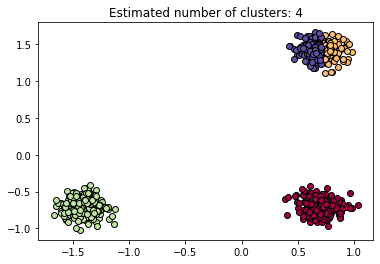

In [2]:
# TRY CONVERTING THIS TO KMEANS
# PLAY AROUND WITH THE HYPERPARAMETERS FOR KMEANS TOO

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

n_samples = 750

centers = [[1, 1], [-1, -1], [1, -1]]

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, labels_true = make_blobs(
    n_samples=n_samples, centers=centers, cluster_std=0.1, random_state=0     # 3 NICE CLUSTERS
    # n_samples=n_samples, centers=centers, cluster_std=0.4, random_state=0   # ORIGINAL -- 3 NICE CLUSTERS
    # n_samples=n_samples, centers=centers, cluster_std=0.6, random_state=0   # EVERYTHING IS PART OF ONE BIG CLUSTER!!!!!!!!
)

#X, labels_true = make_blobs(
#    n_samples=n_samples, centers=centers, cluster_std=0.60, random_state=0
#)

X = StandardScaler().fit_transform(X)


plt.scatter(X[:, 0], X[:, 1])
plt.show()

#------------------------------PLAYING ------------------------------------
db = KMeans(n_clusters = 4).fit(X)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()